In [ ]:
#Reminders
add data to gitignore file

## Set up steps

#### Import relevant Python libraries

In [1]:
#import libaries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### Import heart data into a dataframe

In [2]:
heart_data = pd.read_csv("data/heart.csv")

## Examine the Data

#### Preview the data and get basic information

**[Some background facts about heart disease:](https://towardsdatascience.com/heart-disease-prediction-73468d630cfc)**

It is difficult to identify heart disease because of several contributory risk factors.

Those factors include diabetes, high blood pressure, high cholesterol, abnormal pulse rate, and many other factors.

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.info()
#this dataset has 33 rows and 14 columns, most values are integer data types and the remaining is float values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Search for missing values

In [7]:
missing_values_count = heart_data.isnull().sum()
missing_values_count
#There are no missing values in any of the columns

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Search for inconsistency in the way the data is entered and view the distribution

Some interesting facts about the age variable: 
Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence. It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. Simultaneously, the risk of stroke doubles every decade after age 55.

In [8]:
#Is the data within each column entered consistently?  
#And, how is the data in each column distributed? (plot the data)

age = heart_data['age'].unique()
age


array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Count'>

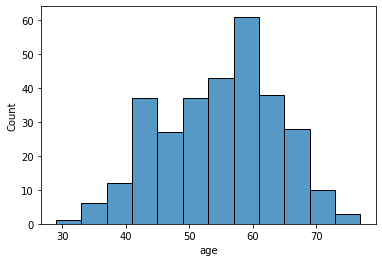

In [9]:
sns.histplot(data=heart_data, x="age")

In [16]:
heart_data["age"].sort_values()

72     29
58     34
125    34
239    35
65     35
       ..
60     71
151    71
129    74
144    76
238    77
Name: age, Length: 303, dtype: int64

In [48]:
#What percentage of each age group are there in the dataset?

# Bin the Age column
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ["20s", "30s", "40s", "50s", "60s", "70s"]

# cut() returns a Pandas Series containing each of the binned column's values translated into their corresponding bins
#this series is appended onto the dataframe
heart_data["age_group"] = pd.cut(heart_data["age"], age_bins, labels=age_labels)

#count the number of patients in each age group
print(heart_data.value_counts('age_group'))

#calculate the percentage of patients in each age group
age_percents = (heart_data.value_counts('age_group') / heart_data['age'].count()) * 100
age_percents


age_group
50s    129
40s     76
60s     73
30s     18
70s      6
20s      1
dtype: int64


age_group
50s    42.574257
40s    25.082508
60s    24.092409
30s     5.940594
70s     1.980198
20s     0.330033
dtype: float64

Some interesting facts about the gender variable:
    Men are at greater risk of heart disease than pre-menopausal women. Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.

In [10]:
gender = heart_data['sex'].unique()
gender
#1 = male, 0 = female

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='Count'>

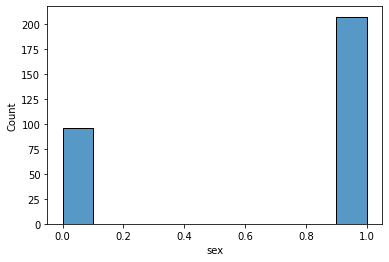

In [12]:
sns.histplot(data=heart_data, x="sex")
#there are twice as many men in this dataset than women

In [13]:
chest_pain_type = heart_data['cp'].unique()
chest_pain_type

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='Count'>

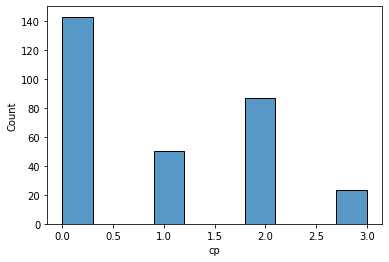

In [14]:
sns.histplot(data=heart_data, x="cp")

In [17]:
resting_blood_pressure = heart_data['trestbps'].unique()
resting_blood_pressure

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [ ]:
# RESTING BLOOD PRESSURE PLOT GOES HERE

Key questions to answer
1. How many data points do I have? Enough for ML? Enough of the classes I’m trying to predict?
2. What are the columns? Column ranges?
3 What will my normalization strategy be? Do I have outliers? Are things in ranges that I expect?
4. What are the datatypes, and will they behave like I expect?
5. Are any numbers stored as strings? Will I have to clean them to get them to be numbers?
6. Do I have any missing values?  Any duplications? How many? Why?
7. Are features correlated?
8. In expected, gut-check ways, in novel ways, but also in data leakage ways: Do I have any weird distributions?
   (Huge skews, bimodal, uniform…)

In [ ]:
#Do any of the columns include similar data - but scaled quite differently? (ex: ft vs. mile for length)